In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the data file
df = pd.read_csv('AirPassengers.csv')

#### Sanity Checks

In [4]:
df.shape

(144, 2)

In [5]:
df.head()

,Date,#Passengers
0,12-Jan-1949,112
1,24-Feb-1949,118
2,22-Mar-1949,132
3,5-Apr-1949,129
4,24-May-1949,121


In [6]:
df.tail()

,Date,#Passengers
139,16-Aug-1960,606
140,14-Sep-1960,508
141,20-Oct-1960,461
142,26-Nov-1960,390
143,4-Dec-1960,432


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [18]:
# convert column Date to datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [20]:
# timedelta is used for calculating an absolute time duration
week_delta = pd.to_timedelta (np.arange(5), unit = 'w')
week_delta

TimedeltaIndex(['0 days', '7 days', '14 days', '21 days', '28 days'], dtype='timedelta64[ns]', freq=None)

In [21]:
# add a time delta to a date
dates = pd.to_datetime(['08/28/2023', '10/02/2023', '12/04/2023', '01/01/2000', '10/08/1992'])
print(dates + week_delta)

DatetimeIndex(['2023-08-28', '2023-10-09', '2023-12-18', '2000-01-22',
               '1992-11-05'],
              dtype='datetime64[ns]', freq=None)


In [22]:
# time spans
pd.Period('2023')

#A as in annual - ending in December (DEC)

Period('2023', 'A-DEC')

In [23]:
pd.Period('2023-10')

Period('2023-10', 'M')

In [24]:
pd.Period('2023-10-02')

Period('2023-10-02', 'D')

In [25]:
# date effects - daylight savings time in 2023
timestamp = pd.Timestamp('2023-10-02 00:00:00', tz = 'US/Central')
print(timestamp + pd.Timedelta(days = 1))

2023-10-03 00:00:00-05:00


In [27]:
# create month, day, and day name columns
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_name'] = df['Date'].dt.day_name()

In [28]:
df.head()

,Date,#Passengers,year,month,day,day_name
0,1949-01-12,112,1949,1,12,Wednesday
1,1949-02-24,118,1949,2,24,Thursday
2,1949-03-22,132,1949,3,22,Tuesday
3,1949-04-05,129,1949,4,5,Tuesday
4,1949-05-24,121,1949,5,24,Tuesday


In [29]:
# aggregate passengers by month
passengers_per_month = df.groupby(['month'])[('#Passengers')].agg('sum')
passengers_per_month = passengers_per_month.reset_index()

In [30]:
print(passengers_per_month)

    month  #Passengers
0       1         2901
1       2         2820
2       3         3242
3       4         3205
4       5         3262
5       6         3740
6       7         4216
7       8         4213
8       9         3629
9      10         3199
10     11         2794
11     12         3142


In [31]:
# aggregate passengers by week
passengers_per_day_name = df.groupby(['day_name'])[('#Passengers')].agg('sum')
passengers_per_day_name = passengers_per_day_name.reset_index()
passengers_per_day_name

,day_name,#Passengers
0,Friday,6171
1,Monday,5442
2,Saturday,6920
3,Sunday,6174
4,Thursday,6048
5,Tuesday,4220
6,Wednesday,5388


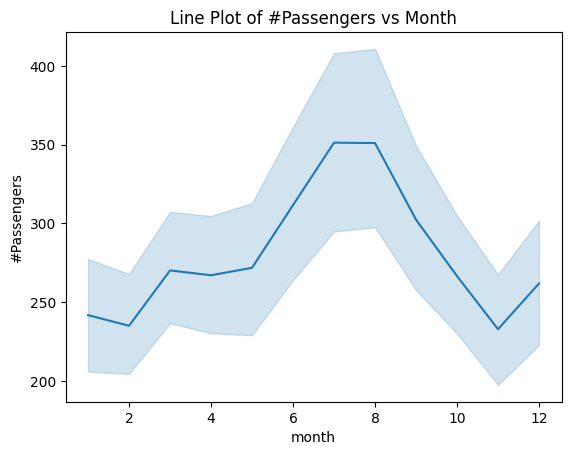

In [32]:
# use lineplot to display
ax = sns.lineplot (x = 'month', y = '#Passengers', data = df, errorbar = ('ci', 80))
ax.set_title ('Line Plot of #Passengers vs Month')
plt.show()

In [33]:
# calculate mean passengers per month
mean_passengers_per_month = df.groupby(['month'])[('#Passengers')].agg('mean').reset_index()
mean_passengers_per_month

,month,#Passengers
0,1,241.750000
1,2,235.000000
2,3,270.166667
3,4,267.083333
4,5,271.833333
5,6,311.666667
6,7,351.333333
7,8,351.083333
8,9,302.416667
9,10,266.583333


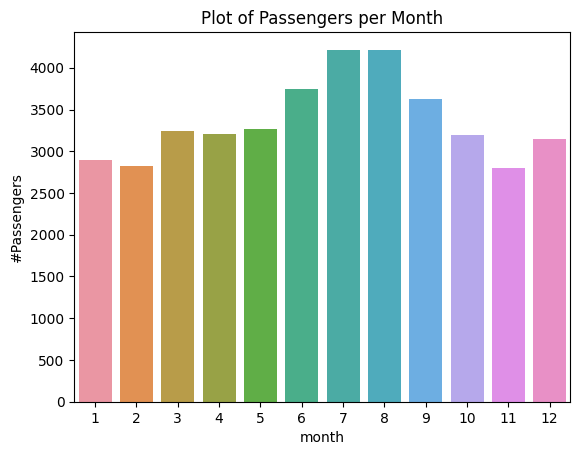

In [34]:
# create a bar plot
ax = sns.barplot (data = passengers_per_month, x = 'month', y = '#Passengers', errorbar=('ci', 95))
ax.set_title ('Plot of Passengers per Month')
plt.show()

In [35]:
# calculate the z-score to get outliers
#compute zscore
p_mean = df['#Passengers'].mean()
p_std = df['#Passengers'].std()
print('Mean =', p_mean)
print('Std =', p_std)

Mean = 280.2986111111111
Std = 119.9663169429432


In [36]:
# indroduce a new column called zscore
df['zscore'] = (df['#Passengers'] - p_mean) / p_std
df['zscore_abs'] = abs(df['zscore'])
df.sort_values(by = 'zscore_abs', ascending = False).head(10)

,Date,#Passengers,year,month,day,day_name,zscore,zscore_abs
138,1960-07-02,622,1960,7,2,Saturday,2.848311,2.848311
139,1960-08-16,606,1960,8,16,Tuesday,2.714940,2.714940
127,1959-08-01,559,1959,8,1,Saturday,2.323164,2.323164
126,1959-07-29,548,1959,7,29,Wednesday,2.231471,2.231471
137,1960-06-02,535,1960,6,2,Thursday,2.123108,2.123108
140,1960-09-14,508,1960,9,14,Wednesday,1.898044,1.898044
115,1958-08-18,505,1958,8,18,Monday,1.873037,1.873037
114,1958-07-13,491,1958,7,13,Sunday,1.756338,1.756338
136,1960-05-27,472,1960,5,27,Friday,1.597960,1.597960
125,1959-06-24,472,1959,6,24,Wednesday,1.597960,1.597960


In [37]:
# obtain the outliers
df_high = df.sort_values (by = 'zscore', ascending = False).head(10)
df_low = df.sort_values (by = 'zscore', ascending = True).head(10)

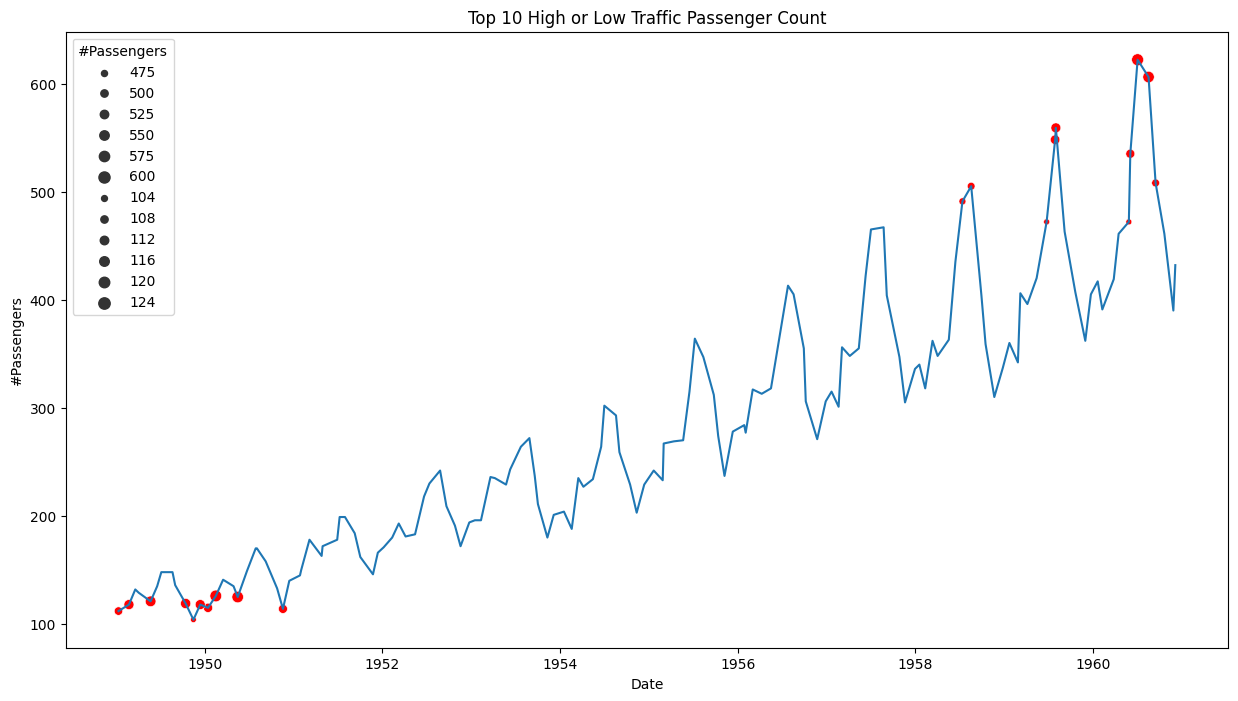

In [38]:
# plot the outliers
plt.figure (figsize = (15,8))
plt.grid = True
plt.title('Top 10 High or Low Traffic Passenger Count')

ax = sns.lineplot (x = 'Date', y = '#Passengers', data = df)

#add the outliers as a scatter plot on this graph
ax = sns.scatterplot (x = 'Date', y = '#Passengers', data = df_high, size = '#Passengers', color = 'r')
ax = sns.scatterplot (x = 'Date', y = '#Passengers', data = df_low, size = '#Passengers', color = 'r')

plt.show()

#### Resampling Data

In [39]:
# read the data file Brimingham Parking Data Set

In [40]:
df1 = pd.read_csv ('carpark.csv')

#### Sanit Checks

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [42]:
df1['LastUpdated'] = pd.to_datetime (df1['LastUpdated'])

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SystemCodeNumber  35717 non-null  object        
 1   Capacity          35717 non-null  int64         
 2   Occupancy         35717 non-null  int64         
 3   LastUpdated       35717 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


In [44]:
df1.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [45]:
# set LastUpdated as the index
#df2 = df1.set_index('LastUpdated')
df2 = df1.set_index (pd.DatetimeIndex (df1['LastUpdated'])).drop('LastUpdated', axis = 1)

In [46]:
df2.head()

,SystemCodeNumber,Capacity,Occupancy
LastUpdated,,,
2016-10-04 07:59:42,BHMBCCMKT01,577,61
2016-10-04 08:25:42,BHMBCCMKT01,577,64
2016-10-04 08:59:42,BHMBCCMKT01,577,80
2016-10-04 09:32:46,BHMBCCMKT01,577,107
2016-10-04 09:59:48,BHMBCCMKT01,577,150


* Upsampling: change from higher granularity to lower granularity - minutes to seconds
* * Risk: You may have not sampled to that level
* Downsampling: change from lower granularity to higher granularity - from month to year
* * Risk: You may be losing details

In [47]:
# resample on a daily basis
df3 = pd.DataFrame()
df3['Occupancy_Sum'] = df2['Occupancy'].resample('D').sum()
df3['Occupancy_Mean'] = df2['Occupancy'].resample('D').mean()

In [48]:
df3.head()

,Occupancy_Sum,Occupancy_Mean
LastUpdated,,
2016-10-04,330394,655.543651
2016-10-05,283040,655.185185
2016-10-06,275159,636.942130
2016-10-07,248954,576.282407
2016-10-08,177207,428.036232


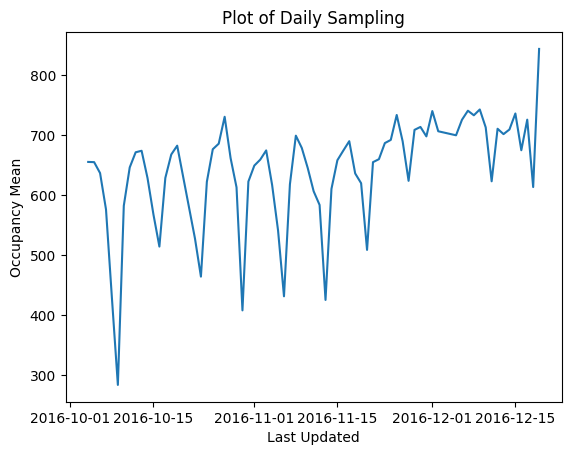

In [49]:
# make a plot with Seaborn
ax = sns.lineplot(x = 'LastUpdated', y = 'Occupancy_Mean', data = df3)
ax.set_title ('Plot of Daily Sampling')
ax.set_xlabel('Last Updated')
ax.set_ylabel('Occupancy Mean')

plt.show()

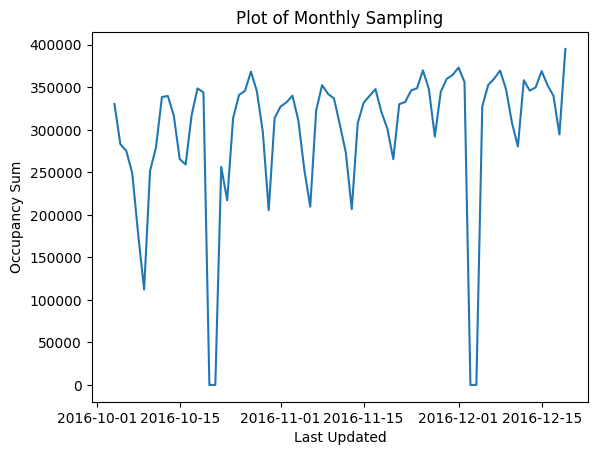

In [50]:
ax = sns.lineplot(x = 'LastUpdated', y = 'Occupancy_Sum', data = df3)
ax.set_title ('Plot of Monthly Sampling')
ax.set_xlabel('Last Updated')
ax.set_ylabel('Occupancy Sum')

plt.show()

In [51]:
# weekly
df3 = pd.DataFrame()
df3['Occupancy_Sum'] = df2['Occupancy'].resample('W').sum()
df3['Occupancy_Mean'] = df2['Occupancy'].resample('W').mean()

In [52]:
df3.head()

,Occupancy_Sum,Occupancy_Mean
LastUpdated,,
2016-10-09,1426885,546.699234
2016-10-16,2050720,612.520908
2016-10-23,1483211,597.105878
2016-10-30,2217972,628.676871
2016-11-06,2087406,600.865285


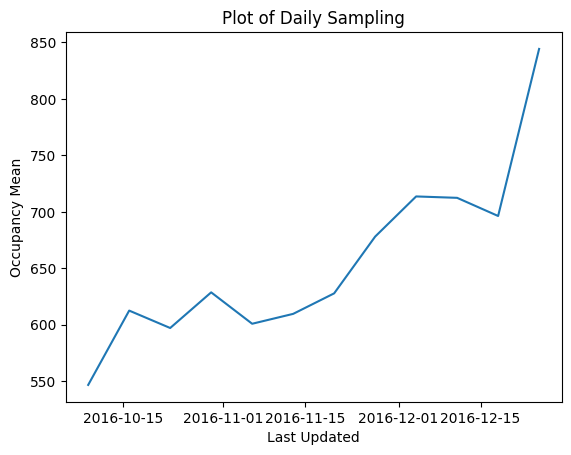

In [53]:
# weekly
ax = sns.lineplot(x = 'LastUpdated', y = 'Occupancy_Mean', data = df3)
ax.set_title ('Plot of Daily Sampling')
ax.set_xlabel('Last Updated')
ax.set_ylabel('Occupancy Mean')

plt.show()